<a href="https://colab.research.google.com/github/smallriver0316/python-datascience-study/blob/development/geothermal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# basemapのインストールに必要なライブラリを取得
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
     - 133.1 MB 4.4 MB/s
     |████████████████████████████████| 6.6 MB 4.5 MB/s 
     |████████████████████████████████| 219 kB 55.6 MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759599 sha256=7d3cf453f66a248b2e8eb367c6f97a9462e15900ff39db41c07c197716e506a8
  Stored in directory: /tmp/pip-ephem-wheel-cache-w

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [12]:
# NASAのゴダート宇宙科学研究所のGIS250の気温データをダウンロード
# ダウンロードURLはWebページ(https://data.giss.nasa.gov/gistemp/)で確認
!curl -O https://data.giss.nasa.gov/pub/gistemp/gistemp250_GHCNv4.nc.gz
!gunzip gistemp250_GHCNv4.nc.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10.5M  100 10.5M    0     0  2166k      0  0:00:04  0:00:04 --:--:-- 2283k


In [3]:
# データはNetCDF形式であるため、PythonのnetCDF4ライブラリをダウンロード
!pip install netcdf4

In [14]:
from netCDF4 import Dataset
data = Dataset('gistemp250_GHCNv4.nc')

In [15]:
from netCDF4 import date2index
from datetime import datetime

# 今回は2014年1月に米国の東半分を覆った「極循環」(polar vortex)に着目する
timeindex = date2index(datetime(2014, 1, 15), data.variables['time'])

In [17]:
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
lon, lat = np.meshgrid(lon, lat)
temp_anomaly = data.variables['tempanomaly'][timeindex]

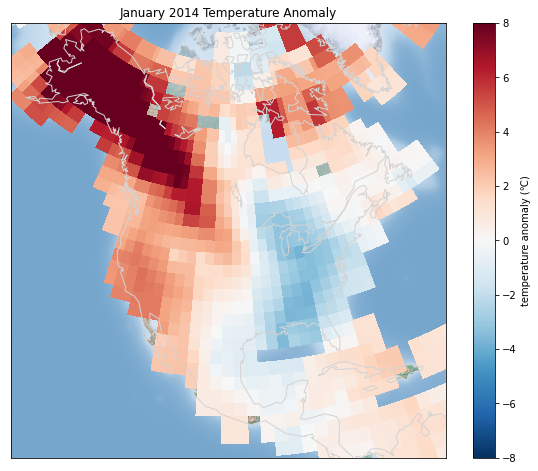

In [19]:
fig = plt.figure(figsize=(10, 8))
m = Basemap(projection='lcc', resolution='c', width=8E6, height=8E6, lat_0=45, lon_0=-100)
m.shadedrelief(scale=0.5)
m.pcolormesh(lon, lat, temp_anomaly, latlon=True, cmap='RdBu_r')
plt.clim(-8, 8)
m.drawcoastlines(color='lightgray')

plt.title('January 2014 Temperature Anomaly')
plt.colorbar(label='temperature anomaly (℃)')

東半分が通常より寒く、
西半分、とりわけアラスカが異常に暑くなったことが見て取れる。